# **√Årvores de Decis√£o**

Nesse m√≥dulo come√ßaremos analisando como treinar, visualizar e fazer predi√ß√µes com √°rvores de decis√£o. Depois, vamos examinar o algoritmo CART, ID3 e CHAID usado pelo Scikit-Learn e explicar como regularizar as √°rvores e utiliz√°-las para tarefas de regress√£o e Classifica√ß√£o.

In [86]:
import importlib
import subprocess
import sys

# Lista de pacotes necess√°rios.
# As chaves s√£o os NOMES PARA INSTALAR COM PIP.
# Os valores s√£o os NOMES DOS M√ìDULOS PARA IMPORTAR (usado por importlib.import_module).
# Se o nome para pip e o nome para importa√ß√£o forem iguais, o valor pode ser o mesmo da chave.
pacotes_para_verificar_e_instalar = {
    "numpy": "numpy",           # pip install numpy -> import numpy
    "matplotlib": "matplotlib", # pip install matplotlib -> import matplotlib
    "pandas": "pandas",         # pip install pandas -> import pandas
    "scikit-learn": "sklearn",  # pip install scikit-learn -> import sklearn
    "IPython": "IPython",       # pip install IPython -> import IPython
    # Adicione outros pacotes aqui, seguindo o padr√£o: "nome_pip": "nome_import"
    # Exemplo: "requests": "requests"
}

In [87]:
# Fun√ß√£o para instalar pacotes
def instalar_pacote(pacote_pip_nome):
    """
    Instala um pacote Python usando pip.
    pacote_pip_nome: o nome do pacote a ser passado para 'pip install'.
    """
    print(f"Instalando {pacote_pip_nome}...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pacote_pip_nome])
        print(f"'{pacote_pip_nome}' instalado com sucesso.")
    except subprocess.CalledProcessError as e:
        print(f"Erro ao instalar '{pacote_pip_nome}': {e}")
        # √â uma boa pr√°tica sair do script se uma depend√™ncia essencial n√£o puder ser instalada.
        sys.exit(1)

# Verifica e instala os pacotes
print("Verificando pacotes necess√°rios...")
for nome_pip, nome_modulo_import in pacotes_para_verificar_e_instalar.items():
    try:
        # Tenta importar o m√≥dulo. Se for bem-sucedido, o pacote j√° est√° instalado.
        importlib.import_module(nome_modulo_import)
        print(f"O pacote '{nome_pip}' (m√≥dulo '{nome_modulo_import}') j√° est√° instalado.")
    except ImportError:
        # Se ImportError ocorrer, o pacote n√£o est√° instalado e precisa ser.
        instalar_pacote(nome_pip)

print("\n---")
print("Todos os pacotes necess√°rios est√£o instalados e prontos para uso.")
print("---")

Verificando pacotes necess√°rios...
O pacote 'numpy' (m√≥dulo 'numpy') j√° est√° instalado.
O pacote 'matplotlib' (m√≥dulo 'matplotlib') j√° est√° instalado.
O pacote 'pandas' (m√≥dulo 'pandas') j√° est√° instalado.
O pacote 'scikit-learn' (m√≥dulo 'sklearn') j√° est√° instalado.
O pacote 'IPython' (m√≥dulo 'IPython') j√° est√° instalado.

---
Todos os pacotes necess√°rios est√£o instalados e prontos para uso.
---


## **Bibliotecas usadas:**

In [1]:
import os  # M√≥dulo para interagir com o sistema operacional (manipular diret√≥rios, arquivos, etc.)

import numpy as np  # Biblioteca fundamental para computa√ß√£o num√©rica com arrays e fun√ß√µes matem√°ticas

import matplotlib.pyplot as plt  # Biblioteca para cria√ß√£o de gr√°ficos e visualiza√ß√µes

import pandas as pd  # Biblioteca para manipula√ß√£o e an√°lise de dados tabulares (DataFrames)

from matplotlib.colors import ListedColormap  # Para criar mapas de cores personalizados em gr√°ficos

from sklearn.datasets import load_iris  # Fun√ß√£o para carregar o dataset Iris, cl√°ssico para classifica√ß√£o

from sklearn.model_selection import train_test_split  # Para dividir o dataset em treino e teste

from sklearn.model_selection import StratifiedKFold  # Para realizar valida√ß√£o cruzada estratificada, preservando propor√ß√µes das classes

from sklearn.base import clone  # Para clonar modelos (√∫til em valida√ß√£o cruzada manual)

from sklearn.tree import DecisionTreeClassifier  # Modelo de √Årvore de Decis√£o para tarefas de classifica√ß√£o

from IPython.display import Image  # Para exibir imagens em ambientes interativos, como Jupyter Notebooks

from sklearn.tree import plot_tree  # Fun√ß√£o para visualizar a √°rvore de decis√£o graficamente

from sklearn.tree import DecisionTreeRegressor  # Modelo de √Årvore de Decis√£o para tarefas de regress√£o

from sklearn import datasets  # Subm√≥dulo para carregar diversos datasets de exemplo do scikit-learn

from sklearn.metrics import accuracy_score, mean_squared_error  # M√©tricas para avaliar desempenho de modelos de classifica√ß√£o e regress√£o

from sklearn import tree  # Subm√≥dulo geral que cont√©m fun√ß√µes e classes relacionadas a √°rvores de decis√£o


## Treinando e Visualizando uma √Årvore de Decis√£o

### O Algor√≠tmo de Treinamento **CART**

O **Scikit-Learn** utiliza o algoritmo **CART (Classification and Regression Tree)** para treinar **√Årvores de Decis√£o**, processo tamb√©m conhecido como "crescimento" das √°rvores. O funcionamento do algoritmo se baseia, inicialmente, na divis√£o do **conjunto de treinamento** em dois subconjuntos, utilizando para isso uma √∫nica **feature** (denotada como `k`) e um determinado **limiar** (`t`), por exemplo: ‚Äúcomprimento da p√©tala ‚â§ 2.45 cm‚Äù.

Mas como o algoritmo escolhe a melhor combina√ß√£o entre `k` e `t`? Ele realiza uma busca exaustiva por todas as poss√≠veis combina√ß√µes, selecionando aquela que produz os subconjuntos mais **puros**, ou seja, com menor mistura de classes. A pureza desses subconjuntos √© ponderada pelo seu tamanho, garantindo que subconjuntos maiores tenham maior influ√™ncia na decis√£o. A **fun√ß√£o de custo** que o CART tenta minimizar √© expressa pela seguinte equa√ß√£o:

$$
J(k, t_k) = \dfrac{m_{esq}}{m}G_{esq} + \dfrac{m_{dir}}{m}G_{dir}
$$


onde:

- `G_esq` e `G_dir` s√£o as medidas de **impureza** dos subconjuntos esquerdo e direito, respectivamente.
- `m_esq` e `m_dir` representam o **n√∫mero de inst√¢ncias** nesses subconjuntos.
- `m` √© o n√∫mero total de inst√¢ncias no conjunto antes da divis√£o.

Ap√≥s encontrar o melhor par `(k, t)`, o algoritmo **divide** o conjunto de treinamento em dois subconjuntos. Em seguida, ele **repete** o mesmo processo recursivamente: tenta novamente encontrar a melhor divis√£o para cada subconjunto, e assim por diante, criando sucessivamente **sub-subconjuntos**. Esse processo recursivo continua at√© que seja atingida uma das seguintes **condi√ß√µes de parada**: 

- a profundidade m√°xima definida pelo hiperpar√¢metro `max_depth`, ou 
- a impossibilidade de encontrar uma divis√£o que reduza a **impureza**.

Al√©m de `max_depth`, o CART possui outros hiperpar√¢metros importantes que controlam as condi√ß√µes de parada:

- `min_samples_split`: n√∫mero m√≠nimo de amostras necess√°rio para realizar uma divis√£o.
- `min_samples_leaf`: n√∫mero m√≠nimo de amostras que um n√≥ folha deve conter.
- `min_weight_fraction_leaf`: fra√ß√£o m√≠nima do peso total que um n√≥ folha deve ter.
- `max_leaf_nodes`: n√∫mero m√°ximo de n√≥s folha permitidos na √°rvore.

> ‚ö†Ô∏è **Importante:**  
> O CART √© um **algoritmo guloso** (*greedy*): ele busca avidamente a melhor divis√£o poss√≠vel no **n√≠vel atual**, e depois repete o processo nos n√≠veis subsequentes, sem considerar se essas escolhas levar√£o √† **melhor solu√ß√£o global** em n√≠veis mais profundos. Embora isso normalmente resulte em uma solu√ß√£o **razoavelmente boa**, ela n√£o √© garantidamente a **√≥tima**.

Infelizmente, encontrar a **√°rvore √≥tima** √© um problema conhecido como **NP-Completo**, o que significa que a sua resolu√ß√£o requer um tempo exponencial em rela√ß√£o ao n√∫mero de inst√¢ncias, `O(exp(m))`, tornando-o **intrat√°vel** mesmo para conjuntos de treinamento de tamanho relativamente pequeno. Por essa raz√£o, aceitamos uma solu√ß√£o que seja **"boa o suficiente"** em vez de buscar a perfei√ß√£o absoluta.

### Fun√ß√µes de Impureza: Gini, Entropia e MSE

As fun√ß√µes de impureza s√£o **m√©tricas** utilizadas por algoritmos de √°rvores de decis√£o para **avaliar a qualidade** de uma divis√£o (split). A ideia central √©: quanto mais ‚Äúpuro‚Äù for um subconjunto ‚Äî ou seja, quanto mais ele contiver apenas uma classe ‚Äî, melhor √© a divis√£o. Dentre as fun√ß√µes de impureza mais usadas destacam-se a **Impureza de Gini** e a **Entropia** (baseada na Teoria da Informa√ß√£o). Para tarefas de **regress√£o**, usa-se uma outra m√©trica: o **Erro Quadr√°tico M√©dio** (*Mean Squared Error*, MSE).

---

#### ‚úÖ Impureza de Gini

##### **1. Intui√ß√£o**

A Impureza de Gini mede a **probabilidade** de que uma inst√¢ncia escolhida **aleatoriamente** do conjunto de dados seja **classificada incorretamente** se for rotulada aleatoriamente segundo a **distribui√ß√£o de classes** no conjunto.

Ou seja, quanto mais **misturadas** estiverem as classes, maior ser√° a impureza. Se todas as inst√¢ncias pertencem a uma √∫nica classe, a impureza √© zero.

---

##### **2. Formula√ß√£o Matem√°tica**

Dado um conjunto de dados com $K$ classes, a impureza de Gini √© definida como:

$$
G = 1 - \sum_{k=1}^K p_k^2
$$

Onde:

- $p_k$ ‚Üí propor√ß√£o (probabilidade) das inst√¢ncias da classe $k$ no conjunto.

---

##### **3. Como se chega nessa f√≥rmula?**

A ideia √© calcular a **probabilidade de erro** ao classificar aleatoriamente segundo a distribui√ß√£o das classes:

1. A chance de pegar uma inst√¢ncia da classe $k$ √© $p_k$.
2. A chance de **n√£o** ser da classe $k$ √© $1 - p_k$.
3. O erro esperado, portanto, ao escolher aleatoriamente uma classe, √©:

$$
\sum_{k=1}^K p_k(1 - p_k)
$$

4. Expandindo a express√£o:

$$
\sum_{k=1}^K (p_k - p_k^2) = \sum_{k=1}^K p_k - \sum_{k=1}^K p_k^2
$$

Mas, como $\sum_{k=1}^K p_k = 1$, temos:

$$
1 - \sum_{k=1}^K p_k^2
$$

Portanto, chegamos √† f√≥rmula cl√°ssica:

$$
G = 1 - \sum_{k=1}^K p_k^2
$$

---

##### **4. Propriedades Importantes**

- $G = 0$ ‚Üí Conjunto puro (todas as inst√¢ncias s√£o da mesma classe).
- $G$ m√°ximo ‚Üí quando as classes est√£o igualmente distribu√≠das.

Por exemplo, para duas classes com $p = 0.5$, temos:

$$
G = 1 - (0.5^2 + 0.5^2) = 0.5
$$

---

#### ‚úÖ Entropia (Impureza da Informa√ß√£o)

##### **1. Intui√ß√£o**

A **Entropia** mede o grau de **incerteza** ou **imprevisibilidade** associado √† distribui√ß√£o das classes. Inspirada na Teoria da Informa√ß√£o de Claude Shannon, ela quantifica a **quantidade m√©dia de informa√ß√£o** necess√°ria para identificar a classe de uma inst√¢ncia.

Quanto maior a mistura de classes, maior a entropia.

---

##### **2. Formula√ß√£o Matem√°tica**

Dado um conjunto com $K$ classes, a Entropia $H$ √© dada por:

$$
H = -\sum_{k=1}^K p_k \log_2(p_k)
$$

Onde:

- $p_k$ ‚Üí propor√ß√£o das inst√¢ncias da classe $k$.

---

##### **3. Como se chega nessa f√≥rmula?**

O racioc√≠nio vem da **Teoria da Informa√ß√£o**:

1. A **informa√ß√£o** associada ao evento da classe $k$ √©:

$$
I(p_k) = -\log_2(p_k)
$$

Isso significa que quanto mais **improv√°vel** for o evento, maior √© a informa√ß√£o obtida ao observ√°-lo.

2. O valor esperado da informa√ß√£o (ou seja, a m√©dia ponderada) √©:

$$
\sum_{k=1}^K p_k \cdot I(p_k) = -\sum_{k=1}^K p_k \log_2(p_k)
$$

Portanto, a Entropia √© essa **m√©dia ponderada**.

---

##### **4. Exemplifica√ß√£o**

Para duas classes balanceadas: $p_1 = 0.5$ e $p_2 = 0.5$:

$$
H = - (0.5 \log_2 0.5 + 0.5 \log_2 0.5) = - (0.5(-1) + 0.5(-1)) = 1
$$

Ou seja, entropia m√°xima = $1$ bit.

Se o conjunto for puro (ex.: $p_1 = 1$, $p_2 = 0$):

$$
H = - (1 \cdot \log_2 1 + 0 \cdot \log_2 0) = 0
$$

(Nota: $0 \log 0 = 0$ por conven√ß√£o).

---

#### ‚úÖ Compara√ß√£o entre Gini e Entropia

| Crit√©rio          | Impureza de Gini                          | Entropia                                  |
|-------------------|------------------------------------------|-------------------------------------------|
| Interpreta√ß√£o     | Probabilidade de erro aleat√≥rio          | M√©dia da informa√ß√£o necess√°ria            |
| C√°lculo           | $1 - \sum p_k^2$                         | $-\sum p_k \log_2(p_k)$                   |
| Complexidade      | Mais simples, computacionalmente leve    | Mais complexa, envolve logaritmos         |
| Aplica√ß√£o         | Muito usada no CART                      | Usada em ID3, C4.5 e outros algoritmos    |

---

#### ‚úÖ Qual √© melhor?

Ambas s√£o muito utilizadas e produzem resultados **similares** na pr√°tica. A escolha depende de:

- **Efici√™ncia computacional** ‚Üí Gini √© mais r√°pida.
- **Interpreta√ß√£o te√≥rica** ‚Üí Entropia tem uma base mais s√≥lida na Teoria da Informa√ß√£o.

Em implementa√ß√µes como a do **Scikit-Learn**, o padr√£o √© usar a **Impureza de Gini**, mas a **Entropia** pode ser facilmente especificada.

---

#### ‚úÖ Mean Squared Error (MSE)

Para tarefas de **regress√£o** com √°rvores de decis√£o, como a **Decision Tree Regressor**, ao inv√©s de usar Gini ou Entropia, utilizamos o **Erro Quadr√°tico M√©dio (MSE)** como fun√ß√£o de custo.

---

##### **1. Intui√ß√£o**

O MSE mede a **m√©dia dos quadrados dos erros** entre os valores reais e os valores previstos. Quanto **menor** for o MSE, **melhor** a divis√£o, pois significa que os valores previstos est√£o mais pr√≥ximos dos reais.

---

##### **2. Formula√ß√£o Matem√°tica**

Dado um conjunto $S$ com $n$ inst√¢ncias, a fun√ß√£o de custo √©:

$$
MSE = \dfrac{\sum_{i=1}^n (y_i - \hat{y})^2}{n}
$$

Onde:

- $y_i$ ‚Üí valor real da $i$-√©sima inst√¢ncia.
- $\hat{y}$ ‚Üí m√©dia dos valores no subconjunto $S$.

---

##### **3. Como se chega nessa f√≥rmula?**

1. Para cada inst√¢ncia, calculamos o **erro**: $y_i - \hat{y}$.
2. Elevamos ao **quadrado** para penalizar erros maiores.
3. Calculamos a **m√©dia** desses quadrados.

Esse processo minimiza a vari√¢ncia dentro de cada subconjunto criado pela divis√£o.

---

##### **4. Propriedades Importantes**

- MSE √© sempre **n√£o-negativo**.
- O **menor valor poss√≠vel** do MSE √© **zero**, indicando previs√£o perfeita.
- Muito **sens√≠vel a outliers**, pois penaliza fortemente erros grandes.

---

### **5. Uso em √Årvores de Regress√£o**

Ao construir uma **√°rvore de regress√£o**, o algoritmo escolhe as divis√µes que **minimizam o MSE** nos subconjuntos resultantes.

---

### ‚úÖ **Formula√ß√£o de G√©ron: Fun√ß√£o de Custo do CART para Regress√£o**

O algoritmo CART busca dividir o conjunto de treinamento de modo a **minimizar** a seguinte fun√ß√£o de custo:

$$
J(k, t_k) = \frac{m_{\text{left}}}{m} MSE_{\text{left}} + \frac{m_{\text{right}}}{m} MSE_{\text{right}}
$$

onde:

- $m$ ‚Üí n√∫mero total de inst√¢ncias no n√≥.
- $m_{\text{left}}$ ‚Üí n√∫mero de inst√¢ncias no subconjunto da esquerda.
- $m_{\text{right}}$ ‚Üí n√∫mero de inst√¢ncias no subconjunto da direita.
- $MSE_{\text{left}}$ ‚Üí MSE do subconjunto da esquerda.
- $MSE_{\text{right}}$ ‚Üí MSE do subconjunto da direita.

---

**E o MSE de cada n√≥ √© dado por:**

$$
MSE_{\text{node}} = \sum_{i \in \text{node}} \left( \hat{y}_{\text{node}} - y^{(i)} \right)^2
$$

sendo que:

$$
\hat{y}_{\text{node}} = \frac{1}{m_{\text{node}}} \sum_{i \in \text{node}} y^{(i)}
$$

Ou seja, a divis√£o √≥tima √© aquela que **minimiza a soma ponderada dos MSEs** dos dois subconjuntos resultantes.

---

#### ‚úÖ Resumo

| Tipo de Problema | Fun√ß√£o de Impureza/Custo                   |
|------------------|-------------------------------------------|
| Classifica√ß√£o    | Impureza de Gini ou Entropia              |
| Regress√£o        | Mean Squared Error (MSE)                  |

### Classifica√ß√£o de √Årvore de Decis√£o

Para entender as √Årvore de Decis√£o, vamos criar uma e dar uma espiada como ela faz as predi√ß√µes. O c√≥digo a seguir treina um ``DecisionTreeClassifier`` no conjunto de dados da √≠ris:

In [27]:
# Carrega a base de dados Iris como um DataFrame do pandas
iris = load_iris(as_frame=True)

# Seleciona duas caracter√≠sticas (features) espec√≠ficas: comprimento e largura da p√©tala
# Converte para um array numpy com .values para uso no modelo
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Obt√©m os r√≥tulos/classes das amostras (0, 1 ou 2) para as tr√™s esp√©cies de Iris
y_iris = iris.target

#### Crit√©rio **GINI**

In [28]:
# Cria um classificador de √°rvore de decis√£o com profundidade m√°xima 2 para evitar overfitting
# Define random_state para garantir que a divis√£o e resultados sejam reprodut√≠veis
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Treina o classificador com as caracter√≠sticas X_iris e as classes y_iris
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

O ``plot_tree`` √© uma fun√ß√£o do ``sklearn.tree`` que permite visualizar diretamente uma √°rvore de decis√£o, sem necessidade de ferramentas externas como **Graphviz**.

In [29]:
# Cria a nova pasta, se n√£o existir
output_dir = "figuras"  # nome da pasta
os.makedirs(output_dir, exist_ok=True)  # cria a pasta; n√£o d√° erro se j√° existir

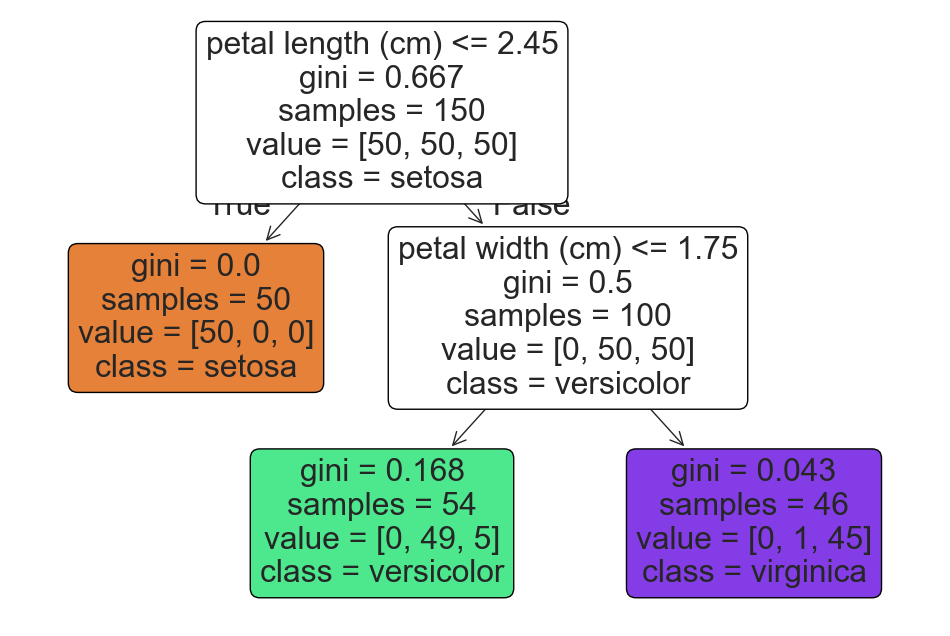

In [30]:
# Cria uma nova figura com tamanho personalizado: largura = 12 polegadas, altura = 8 polegadas
plt.figure(figsize=(12, 8))

# Plota a √°rvore de decis√£o treinada (tree_clf)
plot_tree(
    tree_clf,  # modelo de √°rvore de decis√£o treinado
    feature_names=["petal length (cm)", "petal width (cm)"],  # nomes das features para exibir nos n√≥s
    class_names=iris.target_names,  # nomes das classes para mostrar nas folhas
    filled=True,  # preenche os n√≥s com cores conforme a classe majorit√°ria
    rounded=True  # bordas arredondadas para melhor est√©tica
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_1.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibe a figura gerada
plt.show()

#### Crit√©rio **ENTROPY (ID3):**

In [37]:
# Cria um classificador de √°rvore de decis√£o com profundidade m√°xima 2 para evitar overfitting
# Define random_state para garantir que a divis√£o e resultados sejam reprodut√≠veis
tree_clf_Ent = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')

# Treina o classificador com as caracter√≠sticas X_iris e as classes y_iris
tree_clf_Ent.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

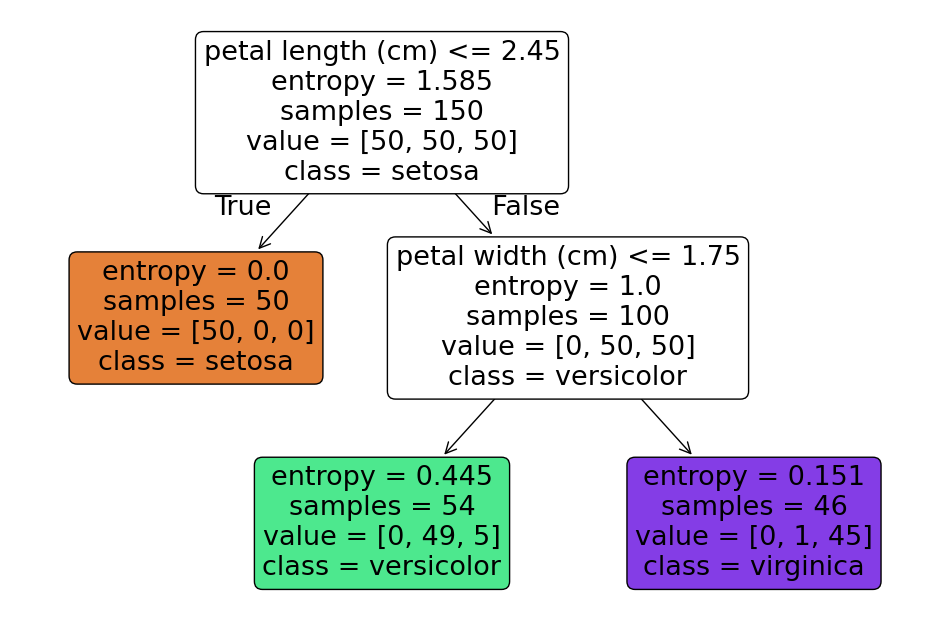

In [46]:
# Cria uma nova figura com tamanho personalizado: largura = 12 polegadas, altura = 8 polegadas
plt.figure(figsize=(12, 8))

# Plota a √°rvore de decis√£o treinada (tree_clf)
plot_tree(
    tree_clf_Ent,  # modelo de √°rvore de decis√£o treinado
    feature_names=["petal length (cm)", "petal width (cm)"],  # nomes das features para exibir nos n√≥s
    class_names=iris.target_names,  # nomes das classes para mostrar nas folhas
    filled=True,  # preenche os n√≥s com cores conforme a classe majorit√°ria
    rounded=True  # bordas arredondadas para melhor est√©tica
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_2.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibe a figura gerada
plt.show()

#### **Gr√°fico de fronteiras de decis√£o**

Em classifica√ß√£o supervisionada, o modelo aprende a separar classes com base em caracter√≠sticas (features). A fronteira de decis√£o √© a linha ou superf√≠cie que divide o espa√ßo de atributos em regi√µes, onde cada regi√£o corresponde a uma previs√£o de classe distinta.

No caso das √Årvores de Decis√£o, a fronteira √© formada por divis√µes retangulares e ortogonais (linhas horizontais ou verticais), resultantes das compara√ß√µes do tipo:

>Se ``feature ‚â§ threshold`` vai para um lado; sen√£o, vai para outro.

In [49]:
# np.meshgrid cria uma grade de valores para comprimento e largura das p√©talas
lengths, widths = np.meshgrid(
    np.linspace(0, 7.2, 100),  # eixo x: de 0 a 7.2 cm com 100 pontos
    np.linspace(0, 3, 100)     # eixo y: de 0 a 3 cm com 100 pontos
)

# Concatena os arrays em uma matriz de shape (10000, 2) ‚Äî todas as combina√ß√µes poss√≠veis
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]

# A √°rvore de decis√£o (tree_clf) prediz a classe para cada ponto da malha
# Resultado √© transformado de volta para o shape da malha (100x100)
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

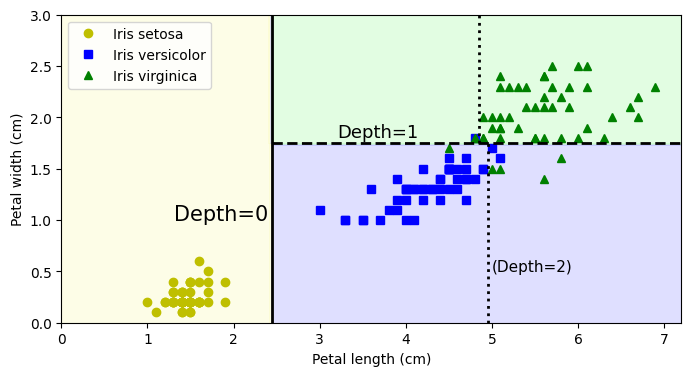

In [50]:
# Cria√ß√£o de colormap personalizado para diferenciar as 3 classes
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

# Define o tamanho da figura: 8 polegadas de largura, 4 de altura
plt.figure(figsize=(8, 4))

# Preenche as regi√µes conforme a classe prevista
# alpha=0.3 -> transpar√™ncia para visualizar os pontos reais sobrepostos
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# Itera sobre as classes de Iris: setosa, versicolor, virginica
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    # Seleciona os pontos pertencentes a cada classe
    plt.plot(
        X_iris[:, 0][y_iris == idx],  # comprimento da p√©tala
        X_iris[:, 1][y_iris == idx],  # largura da p√©tala
        style,  # estilo do marcador: y=amarelo, b=azul, g=verde
        label=f"Iris {name}"  # legenda descritiva
    )

# Cria uma √°rvore com profundidade m√°xima de 3, para melhor visualiza√ß√£o das divis√µes
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)

# Treina a nova √°rvore no conjunto de dados Iris
tree_clf_deeper.fit(X_iris, y_iris)

# Extrai os thresholds das divis√µes: √≠ndices espec√≠ficos dos n√≥s da √°rvore
# Cada threshold corresponde a uma divis√£o no espa√ßo das features
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

# Define os r√≥tulos dos eixos
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

# Primeira divis√£o: vertical em th0 (profundidade 0)
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)

# Segunda divis√£o: horizontal em th1 (profundidade 1), da th0 at√© o fim
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)

# Terceira e quarta divis√µes: verticais, para refinamento nas regi√µes
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)

# Adiciona textos indicando a profundidade de cada divis√£o
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)

# Define os limites dos eixos
plt.axis([0, 7.2, 0, 3])

# Adiciona a legenda com os nomes das classes
plt.legend()

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "Fronteira_de_Decisao.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibe o gr√°fico
plt.show()

O gr√°fico gerado representa as fronteiras de decis√£o de uma √Årvore de Decis√£o treinada para classificar amostras de flores Iris com base em duas caracter√≠sticas:

- Comprimento da p√©tala (``petal length``)

- Largura da p√©tala (``petal width``)

**‚úÖ Como funciona a fronteira de decis√£o:**

- O espa√ßo de atributos (comprimento √ó largura) √© **dividido em regi√µes** onde cada regi√£o corresponde a uma **classe predita** pela √°rvore.

- As **linhas verticais ou horizontais** representam **limiares (thresholds)** onde a √°rvore faz uma **divis√£o (split)**.

- A **primeira divis√£o** (linha mais grossa) ocorre no n√≥ raiz (profundidade 0), separando os dados com base no **comprimento da p√©tala = 2.45 cm**:

    - A √°rea √† esquerda √© pura (apenas Iris-setosa), ent√£o n√£o precisa de mais divis√µes.

    - A √°rea √† direita √© impura (mistura de Iris-versicolor e Iris-virginica), ent√£o ocorre uma nova divis√£o.

- O segundo split ocorre em **largura da p√©tala = 1.75 cm** (linha tracejada), que separa ainda mais os dados.

- Como o ``max_depth`` foi configurado para 2, a √°rvore para nesse ponto.
Se configur√°ssemos ``max_depth=3``, mais duas subdivis√µes ocorreriam, adicionando novas linhas pontilhadas.

#### Estimando Classe de Probabilidades

Uma √Årvore de Decis√£o tamb√©m pode estimar a probabilidade de uma inst√¢ncia pertencer a uma determinada classe $ k $. Para isso, a √°rvore percorre seus n√≥s at√© encontrar a folha correspondente √†quela inst√¢ncia. Em seguida, ela retorna a propor√ß√£o de inst√¢ncias de treinamento daquela classe $ k $ presentes nessa folha. Por exemplo, suponha que voc√™ tenha uma flor cujas p√©talas medem 5 cm de comprimento e 1,5 cm de largura. A folha encontrada ao percorrer a √°rvore √© a folha √† esquerda no n√≠vel de profundidade 2. Nesse caso, a √°rvore de decis√£o deve fornecer as seguintes probabilidades: 0% para Iris setosa (0 de 54 inst√¢ncias nessa folha), 90,7% para Iris versicolor (49 de 54 inst√¢ncias) e 9,3% para Iris virginica (5 de 54 inst√¢ncias). Ao pedir uma predi√ß√£o de classe, o modelo deve retornar Iris versicolor (classe 1), pois √© a classe com maior probabilidade. Vamos verificar isso.

In [61]:
# Usamos o m√©todo predict_proba para obter as probabilidades previstas pelo classificador
# para a inst√¢ncia com caracter√≠sticas [5, 1.5] (p√©talas de 5 cm e 1,5 cm de largura).
# O m√©todo retorna um array com as probabilidades de cada classe para essa inst√¢ncia.
# Usamos .round(3) para arredondar as probabilidades para 3 casas decimais, facilitando a visualiza√ß√£o.
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [62]:
# Usamos o m√©todo predict para prever a classe da inst√¢ncia com caracter√≠sticas [5, 1.5].
# O m√©todo retorna a classe com a maior probabilidade, ou seja, a previs√£o final do modelo.
tree_clf.predict([[5, 1.5]])

array([1])

>VAMOS FAZER MANUALMENTE UMA √ÅRVORE DE DECIS√ÇO DE CLASSIFICA√á√ÇO

| ID | F1 | F2 | F3 | Classe |
| -- | -- | -- | -- | ------ |
| 1  | 2  | 7  | 5  | A      |
| 2  | 3  | 6  | 5  | A      |
| 3  | 4  | 8  | 7  | B      |
| 4  | 5  | 7  | 8  | B      |
| 5  | 6  | 9  | 9  | B      |
| 6  | 7  | 6  | 8  | C      |
| 7  | 8  | 5  | 7  | C      |
| 8  | 9  | 4  | 6  | C      |

### Regress√£o de √Årvore de Decis√£o

As **√Årvores de Decis√£o** tamb√©m s√£o capazes de realizar **tarefas de regress√£o**. Diferente das √°rvores de classifica√ß√£o, que predizem r√≥tulos discretos, as √°rvores de regress√£o predizem **valores num√©ricos** minimizando uma fun√ß√£o de custo como o **Erro Quadr√°tico M√©dio (MSE - Mean Squared Error)**.

Vamos construir uma **√°rvore de regress√£o** usando a classe `DecisionTreeRegressor` do **Scikit-Learn**. Iremos trein√°-la em um **conjunto de dados quadr√°tico com ru√≠do** e limitar a profundidade da √°rvore a **2**, para facilitar a visualiza√ß√£o.

In [ ]:
# Definimos uma semente aleat√≥ria para garantir a reprodutibilidade dos resultados.
# Isso significa que, sempre que rodarmos o c√≥digo, obteremos os mesmos n√∫meros aleat√≥rios.
np.random.seed(42)

# Criamos a vari√°vel X_quad com 200 observa√ß√µes aleat√≥rias.
# np.random.rand(200, 1) ‚Üí gera 200 valores entre 0 e 1.
# Subtra√≠mos 0.5 para centralizar os dados entre -0.5 e +0.5.
X_quad = np.random.rand(200, 1) - 0.5  

# Agora criamos a vari√°vel dependente y_quad.
# A rela√ß√£o entre X e y ser√° quadr√°tica: X_quad ** 2 ‚Üí eleva cada valor ao quadrado.
# Adicionamos tamb√©m um ru√≠do aleat√≥rio com distribui√ß√£o normal (Gaussiana).
# np.random.randn(200, 1) ‚Üí gera 200 valores de ru√≠do padr√£o com m√©dia 0 e vari√¢ncia 1.
# Multiplicamos o ru√≠do por 0.025 para que ele seja pequeno, simulando incerteza ou varia√ß√£o nos dados.
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

In [54]:
# Criamos o modelo de √Årvore de Decis√£o para Regress√£o.
# A classe DecisionTreeRegressor √© usada para prever vari√°veis cont√≠nuas (regress√£o), ao contr√°rio da DecisionTreeClassifier, usada para classifica√ß√£o.

tree_reg = DecisionTreeRegressor(
    max_depth=2,       # Par√¢metro que limita a profundidade m√°xima da √°rvore.
                      # Neste caso, a √°rvore ter√° no m√°ximo dois n√≠veis de splits.
                      # Isso evita o overfitting e garante uma estrutura mais simples e interpret√°vel.

    random_state=42   # Define uma semente para garantir que a constru√ß√£o da √°rvore seja reprodut√≠vel.
                      # Como existem empates ou aleatoriedade na escolha dos splits, isso garante sempre o mesmo resultado.
)

# Agora ajustamos o modelo aos dados.
# O m√©todo fit realiza o treinamento: a √°rvore encontra os melhores pontos de divis√£o (splits) 
# nos dados, de forma a minimizar o erro quadr√°tico m√©dio (MSE) em cada divis√£o.

tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

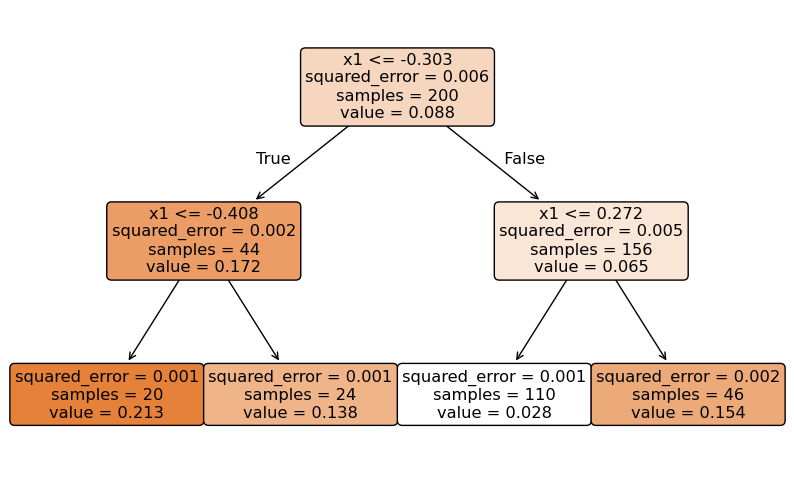

In [55]:
# Criamos uma figura com tamanho maior para que a √°rvore fique leg√≠vel.
plt.figure(figsize=(10, 6))

# Usamos a fun√ß√£o plot_tree para desenhar a √°rvore de decis√£o treinada.
plot_tree(
    tree_reg,            # O modelo de √°rvore de decis√£o j√° treinado.
    feature_names=["x1"],# O nome da vari√°vel de entrada, que ser√° exibido nos n√≥s da √°rvore.
    rounded=True,        # Deixa os cantos das caixas arredondados para uma visualiza√ß√£o mais est√©tica.
    filled=True,         # Preenche os n√≥s com cores representando a escala dos valores previstos.
    impurity=True,       # Mostra a impureza (MSE) de cada n√≥.
    precision=3          # Define a quantidade de casas decimais exibidas nos valores.
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_3.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibimos o gr√°fico na tela.
plt.show()

Esta √°rvore de regress√£o √© muito semelhante √† √°rvore de classifica√ß√£o que vimos anteriormente, mas h√° uma diferen√ßa essencial: em vez de prever uma classe em cada n√≥, ela prev√™ um valor num√©rico. Por exemplo, suponha que desejamos fazer uma previs√£o para uma nova inst√¢ncia com `x = 0.6`. O processo de predi√ß√£o ocorre percorrendo a √°rvore a partir do n√≥ raiz, seguindo os ramos conforme as condi√ß√µes estabelecidas (como `x <= valor` ou `x > valor`), at√© alcan√ßar um n√≥ folha. Quando isso acontece, a √°rvore retorna um valor num√©rico ‚Äî no exemplo citado, esse valor seria `0.154`.

Esse valor representa a m√©dia dos valores alvo (`y`) das 110 inst√¢ncias de treinamento que tamb√©m seguiram esse mesmo caminho na √°rvore e chegaram a essa folha. Al√©m disso, essa previs√£o est√° associada a um erro quadr√°tico m√©dio (MSE) de `0.002`, o que significa que, para essas 110 amostras, a m√©dia dos quadrados das diferen√ßas entre os valores reais e o valor previsto √© relativamente baixa, indicando uma boa qualidade de ajuste naquele subconjunto de dados.

Em resumo, a √°rvore de regress√£o funciona agrupando os dados em subconjuntos que sejam internamente homog√™neos em rela√ß√£o ao valor da vari√°vel dependente, e para cada grupo, faz a previs√£o utilizando a m√©dia das respostas observadas. A profundidade da √°rvore controla o n√≠vel de detalhe dessas divis√µes: √°rvores mais profundas criam grupos mais espec√≠ficos, podendo melhorar a precis√£o, mas tamb√©m aumentando o risco de *overfitting*, ou seja, de ajustar-se demais aos dados de treinamento e perder capacidade de generaliza√ß√£o.

#### Threshold

Primeiramente, criamos um novo modelo de √Årvore de Decis√£o para Regress√£o (`DecisionTreeRegressor`) com `max_depth=3`. Isso significa que a √°rvore poder√° ter at√© tr√™s n√≠veis de divis√£o, o que potencialmente permite capturar padr√µes mais complexos nos dados. A defini√ß√£o do `random_state=42` garante a reprodutibilidade dos resultados.

In [57]:
# Criamos um novo modelo de √Årvore de Decis√£o para Regress√£o.
# Aqui definimos a profundidade m√°xima da √°rvore como 3.
# Isso significa que ela pode realizar at√© 3 divis√µes (ou n√≠veis) para ajustar melhor o modelo aos dados.
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)

Em seguida, treinamos esse modelo com os mesmos dados quadr√°ticos utilizados anteriormente (``X_quad`` e ``y_quad``). O m√©todo ``fit()`` √© respons√°vel por ajustar o modelo aos dados, ou seja, construir a estrutura da √°rvore de decis√£o baseada nesses dados.

In [58]:
# Treinamos o modelo utilizando os mesmos dados quadr√°ticos gerados anteriormente.
# O modelo aprende a partir desses dados e constr√≥i a √°rvore com base neles.
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

Ap√≥s o treinamento, podemos inspecionar a estrutura interna da √°rvore acessando o atributo ``tree_``. Mais especificamente, o atributo ``threshold`` armazena os valores de divis√£o que foram aprendidos em cada n√≥ interno da √°rvore. Esses limiares determinam como o espa√ßo de entrada foi particionado.

In [59]:
# Acessamos os limiares (thresholds) dos n√≥s internos da √°rvore original (tree_reg).
# O atributo 'tree_' cont√©m a estrutura interna da √°rvore ap√≥s o treinamento,
# e 'threshold' mostra os valores das condi√ß√µes de divis√£o em cada n√≥.
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

Tamb√©m podemos verificar os limiares para a nova √°rvore treinada com profundidade 3, usando o mesmo atributo. Comparar os ``thresholds`` de √°rvores com diferentes profundidades √© uma maneira interessante de entender como a complexidade do modelo afeta suas divis√µes e sua capacidade de ajustar-se aos dados.

In [60]:
# Fazemos o mesmo para a segunda √°rvore (tree_reg2), que possui uma profundidade maior.
# Ao comparar os thresholds das duas √°rvores, podemos perceber como o aumento da profundidade
# permite que o modelo fa√ßa divis√µes mais refinadas no espa√ßo de atributos.
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

Este modelo tem suas previs√µes representadas √† esquerda na figura abaixo. Se voc√™ definir `max_depth=3`, obter√° as previs√µes representadas √† direita. Observe como o valor previsto para cada regi√£o √© sempre a m√©dia dos valores alvo (target) das inst√¢ncias daquela regi√£o. O algoritmo divide cada regi√£o de forma a fazer com que a maioria das inst√¢ncias de treinamento fiquem o mais pr√≥ximo poss√≠vel do valor previsto.

#### Gr√°fico de Regress√£o de √Årvore de Decis√£o

In [ ]:
# Fun√ß√£o para plotar as previs√µes de um modelo de regress√£o baseado em √°rvore de decis√£o,
# dentro de um intervalo de valores predefinido.
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    # Cria um array de 500 pontos uniformemente espa√ßados no intervalo especificado pelos primeiros dois elementos de 'axes'.
    # Esses pontos s√£o usados para visualizar suavemente a linha de previs√£o do modelo.
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)  # reshape(-1,1) transforma o array em uma matriz coluna de 500 linhas e 1 coluna.
    
    # Usa o modelo de √°rvore de decis√£o (tree_reg) previamente treinado para prever os valores de sa√≠da (y) 
    # correspondentes a cada um dos pontos x1.
    y_pred = tree_reg.predict(x1)
    
    # Define os limites dos eixos do gr√°fico: [x_min, x_max, y_min, y_max], conforme passado por par√¢metro.
    plt.axis(axes)
    
    # Rotula o eixo x com a nota√ß√£o LaTeX "$x_1$", indicando a vari√°vel independente.
    plt.xlabel("$x_1$")
    
    # Plota os pontos de dados reais utilizados no treinamento: X no eixo x e y no eixo y.
    # "b." significa cor azul ("b") e marcador de ponto (".").
    plt.plot(X, y, "b.")
    
    # Plota as previs√µes do modelo: pontos de x1 no eixo x e y_pred no eixo y.
    # Estilo "r.-" significa linha cont√≠nua ("-"), de cor vermelha ("r") e com marcadores de ponto (".").
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")  
    # label √© o nome que aparecer√° na legenda, usando nota√ß√£o LaTeX para indicar y chap√©u (previs√£o).


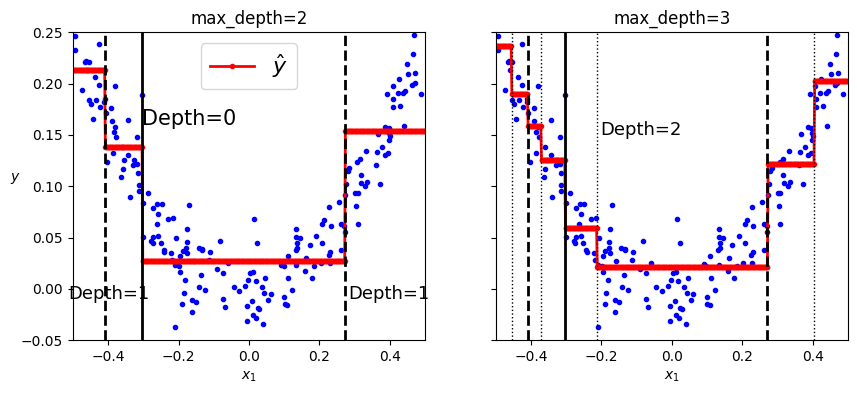

In [ ]:
# Cria uma figura contendo duas subplots (gr√°ficos), organizados lado a lado (ncols=2),
# com um tamanho de 10 por 4 polegadas.
# sharey=True significa que ambos os gr√°ficos compartilham o mesmo eixo y.
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Seleciona o primeiro eixo (gr√°fico da esquerda) para que os comandos de plotagem subsequentes
# sejam aplicados a ele.
plt.sca(axes[0])

# Plota as previs√µes do modelo de √°rvore de decis√£o (tree_reg), treinado com profundidade m√°xima de 2,
# junto com os dados reais, no primeiro gr√°fico.
plot_regression_predictions(tree_reg, X_quad, y_quad)

# Extrai os valores de threshold (limiares) que a √°rvore utilizou para realizar as divis√µes de decis√£o
# nos n√≥s de profundidade 0 (raiz) e profundidade 1.
# O atributo 'tree_' representa a estrutura interna da √°rvore, e 'threshold' armazena os valores de corte.
# Aqui pegamos os thresholds dos n√≥s com √≠ndices 0 (raiz), 1 e 4.
th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]

# Para cada limiar obtido, plota uma linha vertical no gr√°fico para visualizar onde a √°rvore fez a divis√£o:
# - 'k-' significa linha preta ("k" de "black"), estilo s√≥lido.
# - 'k--' significa linha preta com estilo tracejado.
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    # Cada linha √© desenhada de (split, y_min) at√© (split, y_max).
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)

# Insere textos explicativos no gr√°fico, pr√≥ximos aos limiares.
# Indica a profundidade da divis√£o da √°rvore.
plt.text(th0, 0.16, "Depth=0", fontsize=15)  # Texto para a raiz (profundidade 0)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)  # Ajuste horizontal para clareza.
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)

# Configura o r√≥tulo do eixo y com nota√ß√£o LaTeX, mantendo a rota√ß√£o vertical padr√£o desativada (rotation=0).
plt.ylabel("$y$", rotation=0)

# Adiciona uma legenda ao gr√°fico, posicionada na parte superior central.
plt.legend(loc="upper center", fontsize=16)

# Define o t√≠tulo para o gr√°fico da esquerda, indicando a profundidade m√°xima da √°rvore.
plt.title("max_depth=2")

# Seleciona o segundo eixo (gr√°fico da direita) para plotagem.
plt.sca(axes[1])

# Extrai os thresholds correspondentes √†s divis√µes adicionais feitas pelo modelo com maior profundidade.
# Aqui usamos a √°rvore tree_reg2, treinada com max_depth=3.
# S√£o extra√≠dos os thresholds dos n√≥s de √≠ndices 2, 5, 9 e 12, que correspondem a divis√µes adicionais.
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]

# Plota as previs√µes do modelo tree_reg2 (mais profundo) e os dados reais no segundo gr√°fico.
plot_regression_predictions(tree_reg2, X_quad, y_quad)

# Plota novamente as mesmas divis√µes feitas pelo modelo anterior (com max_depth=2), 
# para efeito de compara√ß√£o visual.
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)

# Plota as novas divis√µes realizadas pelo modelo mais profundo.
# Estilo "k:" significa linha preta ("k") com estilo pontilhado (":").
# linewidth=1 significa uma linha mais fina.
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)

# Adiciona texto explicativo indicando uma das divis√µes feitas na profundidade 2.
# Isso ilustra que o modelo mais profundo realiza divis√µes adicionais.
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)

# Define o t√≠tulo do segundo gr√°fico, indicando a maior profundidade utilizada.
plt.title("max_depth=3")

# Define o caminho completo do arquivo de sa√≠da, utilizando o diret√≥rio especificado por output_dir,
# e nomeando o arquivo como "grafico_regress_tree.png".
output_path = os.path.join(output_dir, "grafico_regress_tree.png")

# Salva a figura contendo os dois gr√°ficos no caminho especificado.
# dpi=300 garante alta resolu√ß√£o.
# bbox_inches='tight' remove espa√ßos em branco desnecess√°rios ao redor da figura.
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibe a figura na tela com os dois gr√°ficos lado a lado.
plt.show()

>‚úÖ **O que o gr√°fico mostra:**

- Eixo X (x‚ÇÅ): vari√°vel de entrada.

- Eixo Y (y): vari√°vel de sa√≠da (observada e prevista).

- Pontos azuis: dados observados.

- Linha vermelha (≈∑): previs√£o do modelo ‚Äî valores constantes por regi√µes.

- Linhas verticais: divis√µes feitas pela √°rvore:

    - S√≥lida: raiz (profundidade 0).

    - Tracejadas: profundidade 1.

    - Pontilhadas: profundidade 2 (somente no segundo gr√°fico).

>‚úÖ **Primeiro gr√°fico (esquerda, max_depth = 2):**
A √°rvore divide os dados em at√© 3 regi√µes: uma divis√£o principal e duas subsequentes. O modelo prev√™ valores constantes em cada regi√£o, gerando uma linha "em degraus". √â uma aproxima√ß√£o simples, com baixo risco de overfitting, mas poss√≠vel underfitting.

>‚úÖ **Segundo gr√°fico (direita, max_depth = 3):**
Com mais profundidade, a √°rvore cria divis√µes adicionais, aumentando os "degraus" e melhorando o ajuste aos dados. A previs√£o fica mais detalhada, mas h√° maior risco de overfitting.

>‚úÖ **Interpreta√ß√£o das divis√µes:**
Cada linha vertical representa uma decis√£o bin√°ria da √°rvore: "x‚ÇÅ √© menor ou maior que certo limiar?". As divis√µes mais profundas refinam as previs√µes, mas aumentam a complexidade e o risco de sobreajuste.

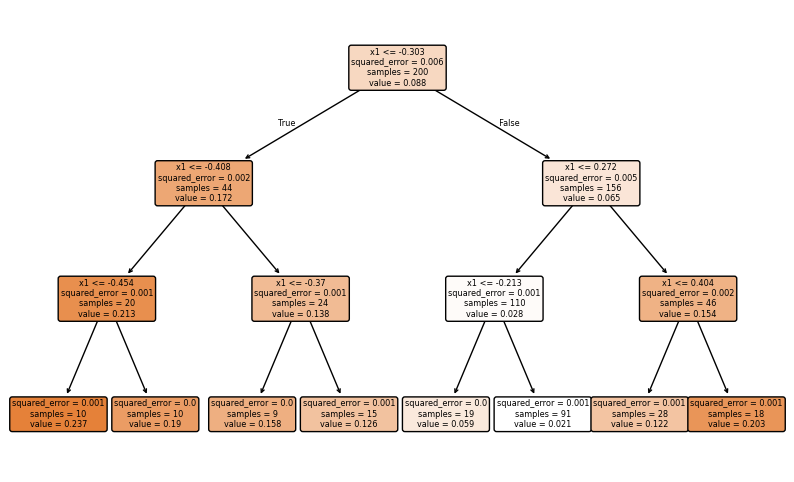

In [65]:
# Criamos uma figura com tamanho maior para que a √°rvore fique leg√≠vel.
plt.figure(figsize=(10, 6))

# Usamos a fun√ß√£o plot_tree para desenhar a √°rvore de decis√£o treinada.
plot_tree(
    tree_reg2,            # O modelo de √°rvore de decis√£o j√° treinado.
    feature_names=["x1"],# O nome da vari√°vel de entrada, que ser√° exibido nos n√≥s da √°rvore.
    rounded=True,        # Deixa os cantos das caixas arredondados para uma visualiza√ß√£o mais est√©tica.
    filled=True,         # Preenche os n√≥s com cores representando a escala dos valores previstos.
    impurity=True,       # Mostra a impureza (MSE) de cada n√≥.
    precision=3          # Define a quantidade de casas decimais exibidas nos valores.
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_4.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibimos o gr√°fico na tela.
plt.show()

>VAMOS FAZER MANUALMENTE UMA √ÅRVORE DE DECIS√ÇO DE REGRESS√ÉO

| Inst√¢ncia | x1 | x2 | y  |
| --------- | -- | -- | -- |
| 1         | 1  | 0.2  | 4.5 |
| 2         | 1.5  | 0.4  | 5 |
| 3         | 2  | 0.6  | 5.5 |
| 4         | 2.5  | 0.8  | 6 |
| 5         | 3  | 1  | 6.5 |
| 6         | 3.5  | 1.2  | 7 |

## **Teste e Valida√ß√£o**

### Testando e Validando Modelos

A √∫nica forma de saber qu√£o bem um modelo ir√° generalizar para novos casos √© testando-o efetivamente em dados que ele nunca viu antes. Uma maneira √© colocar o modelo em produ√ß√£o e monitorar seu desempenho, mas isso pode ser arriscado: se o modelo for muito ruim, os usu√°rios ir√£o reclamar.

Uma abordagem mais segura √© dividir os dados em dois conjuntos: **treinamento** e **teste**. Como os nomes indicam, voc√™ treina o modelo no conjunto de treinamento e testa seu desempenho no conjunto de teste. O erro que o modelo comete em novos dados √© chamado de **erro de generaliza√ß√£o** (ou erro fora da amostra). Avaliar o modelo no conjunto de teste fornece uma estimativa desse erro, indicando o qu√£o bem o modelo pode performar em dados in√©ditos.

Se o erro no conjunto de treinamento for baixo, mas o erro de generaliza√ß√£o for alto, isso indica que o modelo est√° **overfittando** ‚Äî ou seja, est√° ajustado demais aos dados de treino e n√£o generaliza bem.

> **Dica:** √© comum usar 80% dos dados para treino e reservar 20% para teste. No entanto, isso depende do tamanho do conjunto de dados. Por exemplo, com 10 milh√µes de inst√¢ncias, segurar apenas 1% para teste j√° fornece uma base grande o suficiente para uma boa estimativa do erro de generaliza√ß√£o.

### Ajuste de Hiperpar√¢metros e Sele√ß√£o de Modelo

Avaliar um modelo usando apenas o conjunto de teste √© simples, mas pode ser insuficiente quando h√° d√∫vida entre dois modelos diferentes (por exemplo, um modelo linear e outro polinomial). Uma estrat√©gia √© treinar ambos e comparar seu desempenho no conjunto de teste.

Mas e se quisermos ajustar hiperpar√¢metros, como a regulariza√ß√£o, para evitar overfitting? Uma abordagem seria testar v√°rias combina√ß√µes desses hiperpar√¢metros e escolher a que apresentar melhor desempenho no conjunto de teste.

Por√©m, isso pode levar a um problema chamado **vazamento de teste**: ao otimizar hiperpar√¢metros repetidamente usando o conjunto de teste, o modelo fica "ajustado" para esse conjunto espec√≠fico, e seu desempenho em dados realmente novos pode ser pior do que o esperado.

### Valida√ß√£o Hold-out

Uma solu√ß√£o para esse problema √© a **valida√ß√£o hold-out**: dentro do conjunto de treinamento, reservamos uma parte para valida√ß√£o, chamada de conjunto de **valida√ß√£o** (ou conjunto de desenvolvimento - dev set). Assim, o processo fica assim:

- Treina-se v√°rios modelos com diferentes hiperpar√¢metros no conjunto de treino reduzido (excluindo o conjunto de valida√ß√£o).
- Avalia-se o desempenho de cada modelo no conjunto de valida√ß√£o.
- Seleciona-se o melhor modelo conforme o desempenho na valida√ß√£o.
- Treina-se o modelo final usando todo o conjunto de treinamento (treino + valida√ß√£o).
- Avalia-se o modelo final no conjunto de teste para estimar o erro de generaliza√ß√£o.

Essa t√©cnica geralmente funciona bem, mas h√° um equil√≠brio importante:  
- Se o conjunto de valida√ß√£o for pequeno demais, a avalia√ß√£o pode ser imprecisa e podemos escolher um modelo sub√≥timo.  
- Se o conjunto de valida√ß√£o for muito grande, o conjunto de treino fica pequeno, e o modelo final pode ficar prejudicado por ter menos dados para aprender.

### Valida√ß√£o K-Fold

Para contornar essas limita√ß√µes, usa-se a **valida√ß√£o cruzada K-Fold**. Nessa t√©cnica:

- O conjunto de dados √© dividido em *K* partes (folds) de tamanho similar.
- O modelo √© treinado *K* vezes, cada vez deixando um fold diferente para valida√ß√£o e usando os outros *K-1* folds para treino.
- A performance do modelo √© avaliada em cada fold de valida√ß√£o, e a m√©dia dessas avalia√ß√µes d√° uma estimativa mais robusta do desempenho.

Assim, conseguimos aproveitar melhor os dados, usando v√°rios conjuntos pequenos de valida√ß√£o, e temos uma medida mais precisa do erro de generaliza√ß√£o. A desvantagem √© o custo computacional maior, pois o modelo precisa ser treinado *K* vezes.

---

**Resumo:**  
- **Hold-out:** simples, divide o dado em treino, valida√ß√£o e teste. Pode ser inst√°vel se os conjuntos forem pequenos.  
- **K-Fold:** usa m√∫ltiplas divis√µes para melhorar a estimativa do desempenho, com maior custo computacional.

---

### **Hold-out Cross-Validation:**

In [2]:
# Carregar a base de dados Iris do scikit-learn
iris = load_iris()
X = iris.data      # Dados de entrada (features) - medidas das flores
y = iris.target    # R√≥tulos/classes correspondentes (tipo da flor)

# Passo 1: Separar o conjunto de teste (20% dos dados totais)
# train_test_split divide os dados em dois conjuntos:
# - X_train_val, y_train_val: que ser√£o usados para treino e valida√ß√£o
# - X_test, y_test: usados apenas para testar o modelo final
# Par√¢metros:
# test_size=0.2 indica que 20% dos dados v√£o para o teste
# random_state=42 garante que a divis√£o seja reprodut√≠vel (sempre a mesma)
# stratify=y mant√©m a propor√ß√£o das classes em ambos conjuntos (estratifica√ß√£o)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Passo 2: Separar treino e valida√ß√£o dentro dos 80% restantes (X_train_val e y_train_val)
# Aqui vamos separar 20% desse conjunto para valida√ß√£o, ou seja,
# 20% dos 80% = 16% do total dos dados
# Isso cria tr√™s conjuntos finais:
# - treino: para ajustar o modelo
# - valida√ß√£o: para ajustar hiperpar√¢metros e selecionar modelos
# - teste: para avalia√ß√£o final e estimativa do erro de generaliza√ß√£o
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

In [3]:
# Exibir os tamanhos dos conjuntos para conferir se a divis√£o est√° correta
print(f"Tamanho treino: {X_train.shape[0]} amostras")      # Aproximadamente 64% do total
print(f"Tamanho valida√ß√£o: {X_val.shape[0]} amostras")     # Aproximadamente 16% do total
print(f"Tamanho teste: {X_test.shape[0]} amostras")        # Exatamente 20% do total

Tamanho treino: 96 amostras
Tamanho valida√ß√£o: 24 amostras
Tamanho teste: 30 amostras


### **K-fold Cross-Validation:**

√Äs vezes, precisamos de mais controle sobre o processo de valida√ß√£o cruzada do que o que o Scikit-Learn oferece pronto para uso. Nesses casos, podemos implementar a valida√ß√£o cruzada manualmente. O c√≥digo a seguir faz, aproximadamente, a mesma coisa que a fun√ß√£o `cross_val_score()` do Scikit-Learn e imprime o mesmo resultado.

In [4]:
# Carregar o dataset Iris (4 atributos, 3 classes)
iris = load_iris()
X = iris.data       # Features (atributos)
y = iris.target     # R√≥tulos/classes (0,1,2)

# Para simplificar, vamos transformar o problema em bin√°rio:
# Detectar se a classe √© 0 (setosa) ou n√£o (1)
y_binary = (y == 0).astype(int)

# Instanciar o classificador DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

In [5]:
# Criar objeto StratifiedKFold para valida√ß√£o cruzada estratificada
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracies = []  # Lista para guardar acur√°cias de cada fold

# Loop que realiza a valida√ß√£o cruzada manual
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y_binary), 1):
    # Clonar o classificador para treino independente em cada fold
    clone_clf = clone(tree_clf)

    # Separar os dados e r√≥tulos para treino e teste do fold atual
    X_train_folds, X_test_fold = X[train_index], X[test_index]
    y_train_folds, y_test_fold = y_binary[train_index], y_binary[test_index]

    # Treinar o classificador no fold de treino
    clone_clf.fit(X_train_folds, y_train_folds)

    # Fazer a predi√ß√£o no fold de teste
    y_pred = clone_clf.predict(X_test_fold)

    # Calcular a acur√°cia do fold
    n_correct = np.sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)

    accuracies.append(accuracy)

    print(f"Fold {fold}: acur√°cia = {accuracy:.4f}")

Fold 1: acur√°cia = 1.0000
Fold 2: acur√°cia = 1.0000
Fold 3: acur√°cia = 1.0000


In [6]:
print(f"Acur√°cias dos folds: {accuracies}")
print(f"\nAcur√°cia m√©dia: {np.mean(accuracies):.4f}")

Acur√°cias dos folds: [1.0, 1.0, 1.0]

Acur√°cia m√©dia: 1.0000


Criamos um pacote que plota os gr√°ficos de Grafo e Fronteira de Decis√£o, vale mais apena automatizar um pouco do que fazer manualmente. O c√≥digo a seguir faz isso, mas voc√™ pode fazer manualmente se preferir.

In [25]:
import tree_plot
from tree_plot import plot_decision_tree, plot_classification_decision_boundary

In [26]:
help(tree_plot)  # Exibe a documenta√ß√£o do m√≥dulo tree_plot

Help on module tree_plot:

NAME
    tree_plot

FUNCTIONS
    plot_classification_decision_boundary(model, X, y, feature_names, class_names=None, output_path=None, figsize=(8, 6), show=True, title='Decision Boundary')
        Plota a fronteira de decis√£o para problemas de classifica√ß√£o bin√°ria ou multiclasse.

        Par√¢metros:
        ----------
        model : sklearn DecisionTreeClassifier
            Modelo treinado.

        X : array-like, shape (n_samples, 2)
            Dados de entrada com exatamente 2 features.

        y : array-like, shape (n_samples,)
            R√≥tulos das classes.

        feature_names : list
            Lista com os nomes das duas features.

        class_names : list, opcional
            Lista com os nomes das classes.

        output_path : str, opcional
            Caminho completo para salvar o gr√°fico (ex.: './figs/boundary.png').

        figsize : tuple, padr√£o (8, 6)
            Tamanho da figura.

        show : bool, padr√£o True
 

In [23]:
# Carregar o dataset Iris (4 atributos, 3 classes)
iris = load_iris()
X = iris.data[:, [0, 1]]  # Pega as features 0 e 1
feature_names = [iris.feature_names[0], iris.feature_names[1]]
y = iris.target     # R√≥tulos/classes (0,1,2)

# Para simplificar, vamos transformar o problema em bin√°rio:
# Detectar se a classe √© 0 (setosa) ou n√£o (1)
y_binary = (y == 0).astype(int)

# üö© Modelo e Valida√ß√£o Cruzada
tree_clf = DecisionTreeClassifier(random_state=42)
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

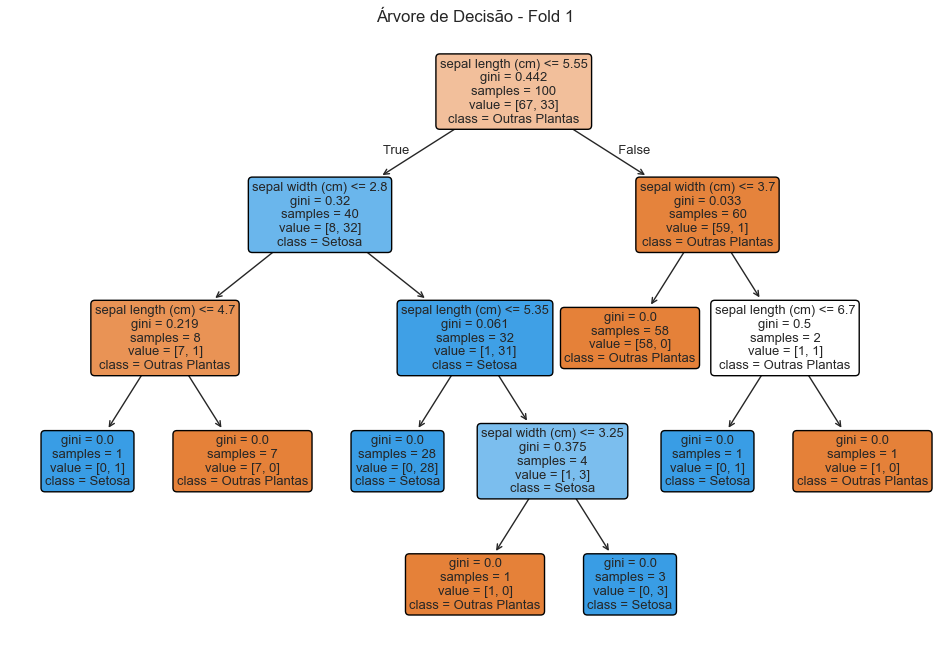

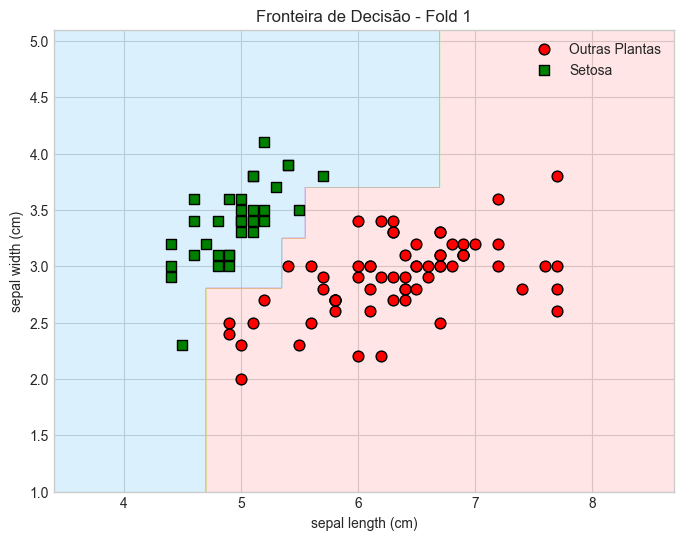

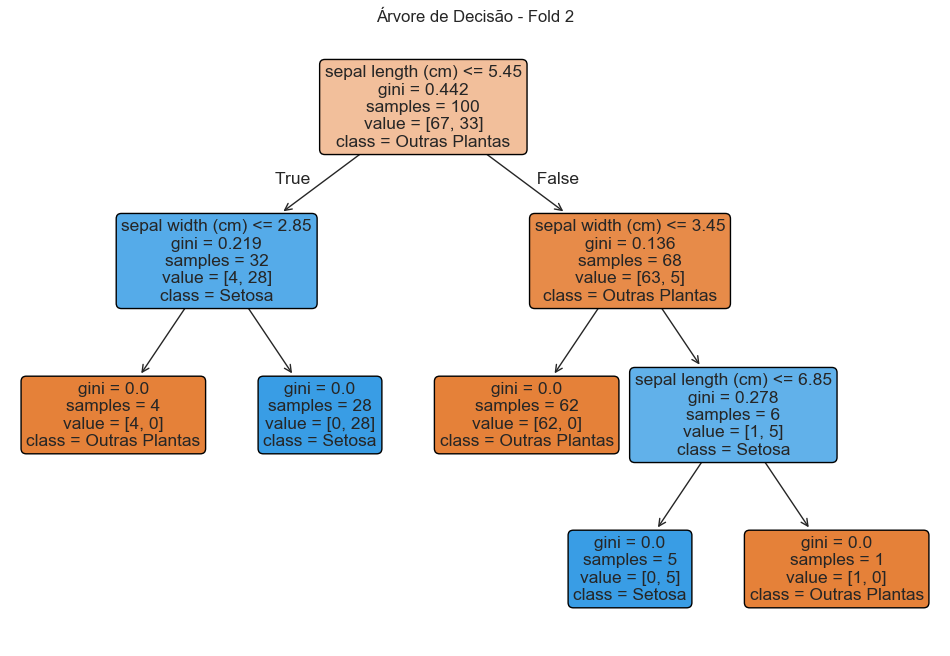

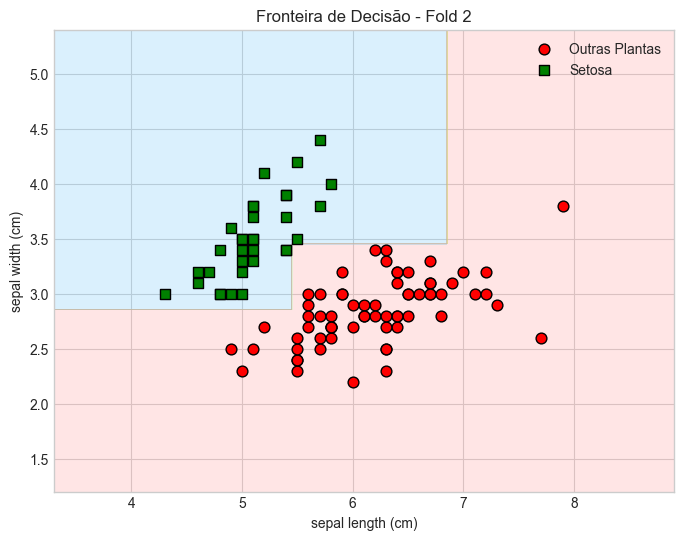

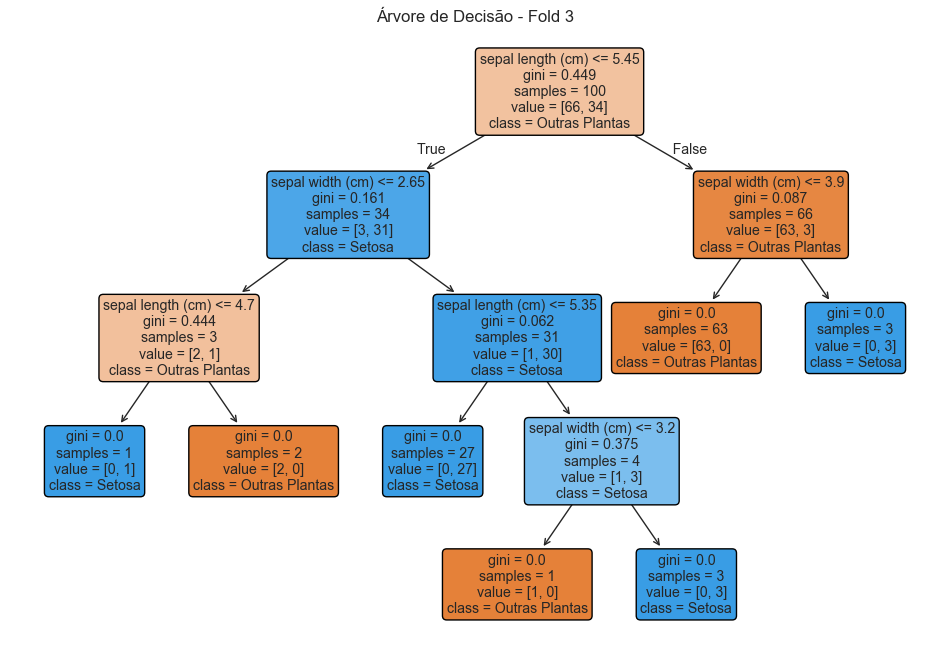

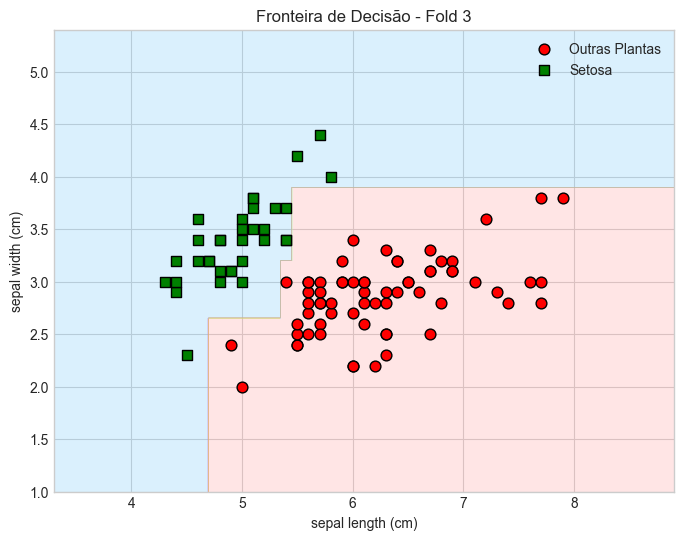

In [ ]:
# Loop que realiza a valida√ß√£o cruzada manualmente utilizando o KFold, iterando sobre os folds gerados.
# A fun√ß√£o enumerate √© usada para obter o √≠ndice do fold (come√ßando em 1 para legibilidade).
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y_binary), 1):

    # Cria uma c√≥pia do classificador de √°rvore de decis√£o original para evitar que o treinamento em um fold
    # afete os outros folds. Isso garante que cada modelo seja treinado do zero.
    clone_clf = clone(tree_clf)

    # Separa os dados de treino e teste com base nos √≠ndices gerados pelo KFold.
    # X_train_folds: subconjunto de X correspondente ao treino deste fold.
    # X_test_fold: subconjunto de X correspondente ao teste deste fold.
    X_train_folds, X_test_fold = X[train_index], X[test_index]
    
    # Da mesma forma, separa os r√≥tulos (y_binary) em treino e teste.
    y_train_folds, y_test_fold = y_binary[train_index], y_binary[test_index]

    # Treina a c√≥pia do classificador no conjunto de treino deste fold.
    clone_clf.fit(X_train_folds, y_train_folds)

    # üî• Plotar o grafo da √°rvore de decis√£o treinada neste fold.
    # A fun√ß√£o plot_decision_tree recebe:
    # - model: o classificador treinado.
    # - feature_names: nomes das features para rotular os n√≥s da √°rvore.
    # - class_names: nomes das classes para rotular as folhas.
    # - title: t√≠tulo do gr√°fico, personalizado com o n√∫mero do fold.
    # - output_path: None, indicando que n√£o ser√° salvo em arquivo.
    # - show: True, exibindo o gr√°fico interativamente.
    plot_decision_tree(
        model=clone_clf,
        feature_names=iris.feature_names,  # üîß ajuste conforme as features do dataset. Aqui, exemplo com Iris.
        class_names=["Outras Plantas", "Setosa"],  # üîß ajuste conforme as classes bin√°rias (ex.: n√£o-Setosa, Setosa).
        title=f"√Årvore de Decis√£o - Fold {fold}",
        output_path=None,
        show=True
    )

    # üî• Plotar a fronteira de decis√£o do classificador treinado neste fold.
    # A fun√ß√£o plot_classification_decision_boundary visualiza as regi√µes de decis√£o geradas pela √°rvore.
    # Par√¢metros:
    # - model: classificador treinado.
    # - X: dados de entrada (neste caso, os dados de treino deste fold).
    # - y: r√≥tulos correspondentes.
    # - feature_names: nomes das features, para rotular os eixos.
    # - class_names: nomes das classes, para legenda.
    # - title: t√≠tulo espec√≠fico para o fold atual.
    # - output_path: None, para n√£o salvar o gr√°fico.
    # - show: True, para exibir o gr√°fico.
    plot_classification_decision_boundary(
        model=clone_clf,
        X=X_train_folds,  # üî∏ Fronteira de decis√£o √© visualizada com base no conjunto de treino do fold.
        y=y_train_folds,
        feature_names=feature_names,  # üîß ajuste conforme as features usadas.
        class_names=["Outras Plantas", "Setosa"],  # üîß ajuste conforme os r√≥tulos usados.
        title=f"Fronteira de Decis√£o - Fold {fold}",
        output_path=None,
        show=True
    )


A classe **StratifiedKFold** realiza uma amostragem estratificada (conforme explicado no antes) para produzir folds que contenham uma propor√ß√£o representativa de cada classe. Em cada itera√ß√£o, o c√≥digo cria uma c√≥pia (clone) do classificador, treina essa c√≥pia nos folds de treinamento e faz previs√µes no fold de teste. Em seguida, conta o n√∫mero de previs√µes corretas e exibe a propor√ß√£o dessas previs√µes corretas.

## ATIVIDADE

Como importar os dados:
```python
# üì¶ Importando bibliotecas necess√°rias
from sklearn.datasets import fetch_openml

# ‚¨áÔ∏è Baixando a base de dados Boston Housing do OpenML
boston = fetch_openml(name="Boston", version=1, as_frame=True)

# ‚¨áÔ∏è Baixando a base de dados Boston Housing do OpenML
boston = fetch_openml(name="Boston", version=1, as_frame=True)

# üóÇÔ∏è Transformando em DataFrame
X = boston.data        # Dados das vari√°veis independentes (features)
y = boston.target      # Vari√°vel dependente (valor m√©dio das casas)
```

> A base de dados Boston Housing √© muito utilizada em problemas de regress√£o e cont√©m informa√ß√µes sobre diferentes bairros da cidade de Boston (EUA), com o objetivo de prever o valor m√©dio das casas baseado em vari√°veis socioecon√¥micas, criminais e estruturais.

| Vari√°vel    | Descri√ß√£o                                                                                  |
| ----------- | ------------------------------------------------------------------------------------------ |
| **CRIM**    | Taxa de criminalidade per capita por bairro.                                               |
| **ZN**      | Propor√ß√£o de terrenos residenciais destinados a lotes maiores que 25.000 p√©s quadrados.    |
| **INDUS**   | Propor√ß√£o de acres de neg√≥cios n√£o varejistas por cidade.                                  |
| **CHAS**    | Vari√°vel bin√°ria: 1 se fizer fronteira com o rio Charles, 0 caso contr√°rio.                |
| **NOX**     | Concentra√ß√£o de √≥xidos n√≠tricos (polui√ß√£o do ar).                                          |
| **RM**      | N√∫mero m√©dio de quartos por habita√ß√£o.                                                     |
| **AGE**     | Propor√ß√£o de unidades ocupadas constru√≠das antes de 1940.                                  |
| **DIS**     | Dist√¢ncias ponderadas at√© cinco centros de neg√≥cios de Boston.                             |
| **RAD**     | √çndice de acessibilidade √†s rodovias radiais.                                              |
| **TAX**     | Taxa de imposto sobre propriedade por US\$10.000.                                          |
| **PTRATIO** | Raz√£o de alunos por professor nas escolas da cidade.                                       |
| **B**       | Propor√ß√£o de afrodescendentes na cidade (c√°lculo espec√≠fico: $1000(Bk - 0.63)^2$).         |
| **LSTAT**   | Porcentagem da popula√ß√£o de status socioecon√¥mico mais baixo.                              |
| **MEDV**    | Valor m√©dio das casas ocupadas pelos propriet√°rios em milhares de d√≥lares (vari√°vel alvo). |


**1) Sele√ß√£o de Vari√°veis (Feature Selection)**

Escolha uma t√©cnica de sele√ß√£o de vari√°veis, como por exemplo:

- An√°lise de correla√ß√£o (selecionar vari√°veis mais correlacionadas com o alvo).

**2)  Dividir em Treino e Teste**

Divida a base em:

- 70% Treino

- 30% Teste

**3) Constru√ß√£o do Modelo**

Crie um modelo de √Årvore de Decis√£o para Regress√£o, utilizando:

- Crit√©rio: "squared_error"

- Profundidade m√°xima (max_depth=3).